In [6]:
pip install torch

   ---------------------------------------- 0.0/198.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/198.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/198.6 MB 262.6 kB/s eta 0:12:37
   ---------------------------------------- 0.0/198.6 MB 262.6 kB/s eta 0:12:37
   ---------------------------------------- 0.1/198.6 MB 328.2 kB/s eta 0:10:05
   ---------------------------------------- 0.1/198.6 MB 374.1 kB/s eta 0:08:51
   ---------------------------------------- 0.2/198.6 MB 731.4 kB/s eta 0:04:32
   ---------------------------------------- 0.4/198.6 MB 1.3 MB/s eta 0:02:31
   ---------------------------------------- 0.6/198.6 MB 1.7 MB/s eta 0:01:58
   ---------------------------------------- 0.7/198.6 MB 1.8 MB/s eta 0:01:53
   ---------------------------------------- 0.7/198.6 MB 1.8 MB/s eta 0:01:53
   ---------------------------------------- 0.9/198.6 MB 1.9 MB/s eta 0:01:47
   ---------------------------------------- 1.2/198.6 MB 2.2 MB/s et

In [2]:
pip install pytorch

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for pytorch
Failed to build pytorch
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [6 lines of output]
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\VANSH GUPTA\AppData\Local\Temp\pip-install-rm7wcw0d\pytorch_20e07959957b49529f9f6a0bffe03330\setup.py", line 15, in <module>
      raise Exception(message)
  Exception: You tried to install "pytorch". The package named for PyTorch is "torch"
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for pytorch
ERROR: Could not build wheels for pytorch, which is required to install pyproject.toml-based projects


In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

In [2]:
import pandas as pd


data = pd.read_csv("C:\\Users\\VANSH GUPTA\\OneDrive\\Desktop\\Air Pollution using LSTM\\delhi_aqi.csv")


print("Shape of the dataset:", data.shape)


print("First few rows of the dataset:")
print(data.head())


print("Missing values in the dataset:")
print(data.isnull().sum())


data['date'] = pd.to_datetime(data['date'])


target_variable = 'pm2_5'


Shape of the dataset: (18776, 9)
First few rows of the dataset:
                  date       co     no     no2     o3    so2   pm2_5    pm10  \
0  2020-11-25 01:00:00  2616.88   2.18   70.60  13.59  38.62  364.61  411.73   
1  2020-11-25 02:00:00  3631.59  23.25   89.11   0.33  54.36  420.96  486.21   
2  2020-11-25 03:00:00  4539.49  52.75  100.08   1.11  68.67  463.68  541.95   
3  2020-11-25 04:00:00  4539.49  50.96  111.04   6.44  78.20  454.81  534.00   
4  2020-11-25 05:00:00  4379.27  42.92  117.90  17.17  87.74  448.14  529.19   

     nh3  
0  28.63  
1  41.04  
2  49.14  
3  48.13  
4  46.61  
Missing values in the dataset:
date     0
co       0
no       0
no2      0
o3       0
so2      0
pm2_5    0
pm10     0
nh3      0
dtype: int64


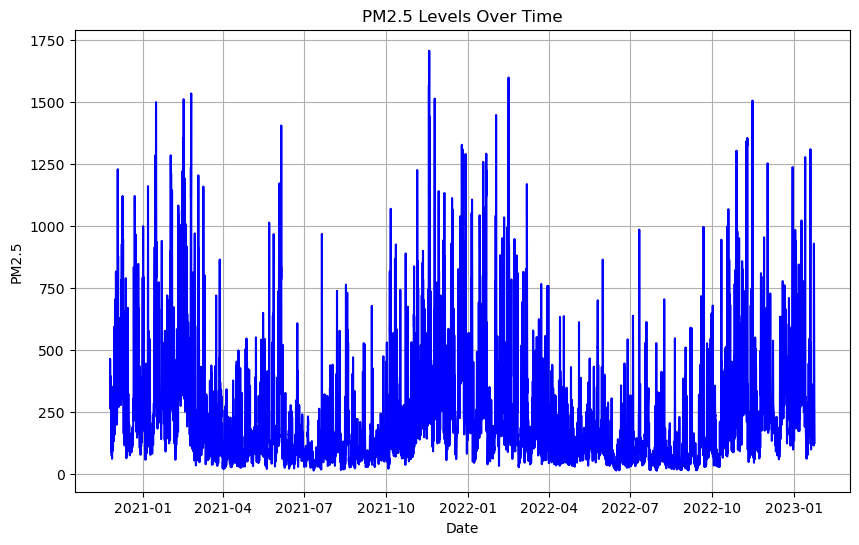

In [3]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.plot(data['date'], data['pm2_5'], color='b')
plt.title('PM2.5 Levels Over Time')
plt.xlabel('Date')
plt.ylabel('PM2.5')
plt.grid(True)
plt.show()


In [21]:
import numpy as np
import torch
import torch.nn as nn
from torch.optim import Adam
from sklearn.preprocessing import MinMaxScaler


X = data[target_variable].values.reshape(-1, 1) 
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(X)
X_tensor = torch.tensor(X_scaled).float()


def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)


sequence_length = 24
X_train, y_train = create_sequences(X_scaled, sequence_length)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train).float()
y_train_tensor = torch.tensor(y_train).float()


class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out


input_size = X_train_tensor.shape[2]
hidden_size = 50
num_layers = 2
output_size = 1
learning_rate = 0.001
num_epochs = 200

model = LSTMModel(input_size, hidden_size, num_layers, output_size)
criterion = nn.MSELoss()
optimizer = Adam(model.parameters(), lr=learning_rate)

# Train the model
for epoch in range(num_epochs):
    model.train()
    outputs = model(X_train_tensor)
    optimizer.zero_grad()
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')



Epoch [10/200], Loss: 0.0171
Epoch [20/200], Loss: 0.0157
Epoch [30/200], Loss: 0.0127
Epoch [40/200], Loss: 0.0088
Epoch [50/200], Loss: 0.0077
Epoch [60/200], Loss: 0.0070
Epoch [70/200], Loss: 0.0066
Epoch [80/200], Loss: 0.0063
Epoch [90/200], Loss: 0.0058
Epoch [100/200], Loss: 0.0054
Epoch [110/200], Loss: 0.0049
Epoch [120/200], Loss: 0.0042
Epoch [130/200], Loss: 0.0033
Epoch [140/200], Loss: 0.0032
Epoch [150/200], Loss: 0.0022
Epoch [160/200], Loss: 0.0020
Epoch [170/200], Loss: 0.0018
Epoch [180/200], Loss: 0.0017
Epoch [190/200], Loss: 0.0016
Epoch [200/200], Loss: 0.0015


In [22]:
# Make predictions for the next 24 hours
with torch.no_grad():
    X_last_24_hours = X_tensor[-sequence_length:].reshape(1, sequence_length, 1)
    next_24_hours_data = model(X_last_24_hours)


next_24_hours_data_actual = scaler.inverse_transform(next_24_hours_data.numpy().reshape(-1, 1))

# Print the predicted PM2.5 values for the next 24 hours
print("Predicted PM2.5 values for the next 24 hours:")
print(next_24_hours_data_actual.flatten())


Predicted PM2.5 values for the next 24 hours:
[158.29704]


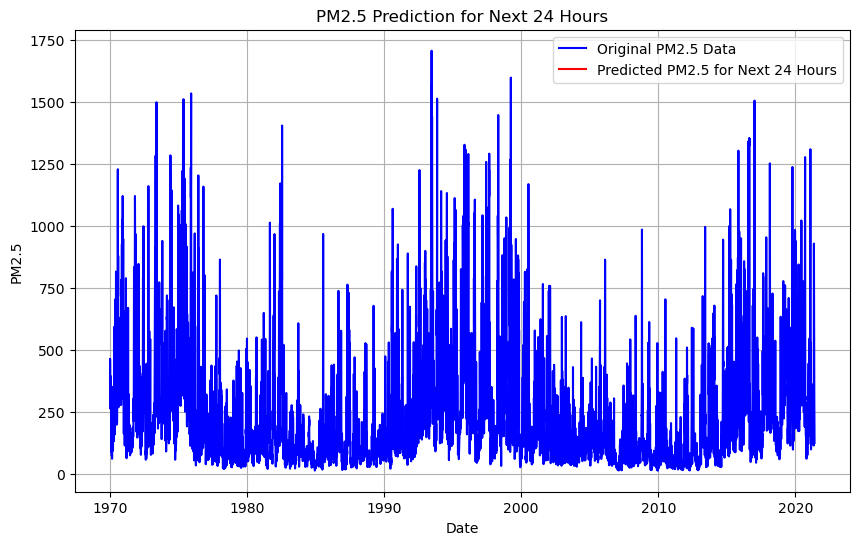

In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming you have defined all necessary variables and models previously

# Get the last timestamp in the dataset
last_timestamp = data.index[-1]

# Concatenate the last timestamp with the index for the next 24 hours
next_24_hours_index = pd.date_range(start=last_timestamp, periods=25, freq='H')[1:]

# Make predictions for the next 24 hours
with torch.no_grad():
    X_last_24_hours = X_tensor[-sequence_length:].reshape(1, sequence_length, 1)
    next_24_hours_data = model(X_last_24_hours)

# Inverse transform the predicted data to get the actual values
next_24_hours_data_actual = scaler.inverse_transform(next_24_hours_data.numpy().reshape(-1, 1))

# Repeat the predicted PM2.5 value for each timestamp in next_24_hours_index
predicted_pm25 = np.repeat(next_24_hours_data_actual.flatten(), len(next_24_hours_index))

# Plot the original data and the predicted values for the next 24 hours
plt.figure(figsize=(10, 6))
plt.plot(data.index, data[target_variable], color='b', label='Original PM2.5 Data')
plt.plot(next_24_hours_index, predicted_pm25, color='r', label='Predicted PM2.5 for Next 24 Hours')
plt.title('PM2.5 Prediction for Next 24 Hours')
plt.xlabel('Date')
plt.ylabel('PM2.5')
plt.legend()
plt.grid(True)
plt.show()


In [6]:
import numpy as np
import torch
import torch.nn as nn
from torch.optim import Adam
from pyexpat import model
from langchain.llms import ollama
from gc import callbacks
from sklearn.preprocessing import MinMaxScaler
def load_llm():
    llm = ollama(model = model,callbacks=callbacks)
    return llm
# Assuming the data, target_variable, sequence_length, X_train_tensor, and y_train_tensor are defined

# Load your large language model (LLM)
llm = load_llm()  # Assuming load_llm() is a function that loads the LLM

# Make predictions using the LSTM model for the next 24 hours
model.eval()
with torch.no_grad():
    lstm_predictions = []
    last_sequence = X_train_tensor[-1].reshape(1, sequence_length, 1)  # Get the last sequence from the training data
    for _ in range(24):  # Predict for 24 hours
        lstm_output = model(last_sequence)
        lstm_predictions.append(lstm_output.item())
        # Update last_sequence by removing the first element and adding the predicted value at the end
        last_sequence = torch.cat((last_sequence[:, 1:, :], lstm_output.unsqueeze(0)), dim=1)

# Inverse transform the LSTM predictions
lstm_predictions = scaler.inverse_transform(np.array(lstm_predictions).reshape(-1, 1))

# Prepare data for the LLM
context = " ".join([str(val) for val in lstm_predictions.flatten()[-sequence_length:]])
question = "What will be the next value of PM2.5 in the next 24 hours?"

# Get the prediction from the LLM
llm_input = {'context': context, 'question': question}
llm_response = llm.predict(llm_input)

# Print the LLM response
print("LLM Response:", llm_response)


TypeError: 'module' object is not callable

In [25]:
pip install ollama

  Using cached httpx-0.25.2-py3-none-any.whl.metadata (6.9 kB)
  Using cached httpcore-1.0.4-py3-none-any.whl.metadata (20 kB)
  Using cached h11-0.14.0-py3-none-any.whl.metadata (8.2 kB)
Using cached httpx-0.25.2-py3-none-any.whl (74 kB)
Using cached httpcore-1.0.4-py3-none-any.whl (77 kB)
Using cached h11-0.14.0-py3-none-any.whl (58 kB)
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install langchain

  Using cached dataclasses_json-0.6.4-py3-none-any.whl.metadata (25 kB)
  Using cached jsonpatch-1.33-py2.py3-none-any.whl.metadata (3.0 kB)
  Using cached typing_inspect-0.9.0-py3-none-any.whl.metadata (1.5 kB)
  Using cached packaging-23.2-py3-none-any.whl.metadata (3.2 kB)
     ---------------------------------------- 0.0/50.7 kB ? eta -:--:--
     ---------------------------------------- 50.7/50.7 kB 2.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/810.5 kB ? eta -:--:--
   -------- ------------------------------- 174.1/810.5 kB 5.3 MB/s eta 0:00:01
   ---------------------- ----------------- 450.6/810.5 kB 5.6 MB/s eta 0:00:01
   ---------------------------------------  809.0/810.5 kB 6.4 MB/s eta 0:00:01
   ---------------------------------------- 810.5/810.5 kB 5.7 MB/s eta 0:00:00
Using cached dataclasses_json-0.6.4-py3-none-any.whl (28 kB)
Using cached jsonpatch-1.33-py2.py3-none-any.whl (12 kB)
   ---------------------------------------- 0.0/1.8 MB ? eta -